# Markowitz Portfolio Optimization

Marokwitz proved the existence of an efficient set of portfolios that optimize investor's return for the amount of risk they're willing to accept. One of the most important highlights of his work is that investments in multiple securities shouldn't be analyzed separately but should be considered in a portfolio, and financer's must understand how different securities in a portfolio interacts with each other. 

Through the combination of securities with low correlation, investors can optimize their returns without assuming additional risk. 

Markowitz assumes investors are rational and risk averse, so they are interested in earning higher returns and prefer avoiding additional risk. This leads to the conclusion that for any level of risk, investors will be interested only in the portfolio with the highest expected return. 

Let's assume only two companies exist in an economy.

- Share A:
    - Expected return: 7%
    - Standard dev.: 5%
- Share B:
    - Expected return: 9%
    - Standard dev.: 8%

Correlation: 30%

Investors can use their shares to form portfolios:

- P1: A(100%), B(0%)
    - expected return: (7% * 100%) + (9% * 0%) = 7%
    - sd: (100%^2 * 5% + 0%^2 * 8% + 2 * 30% * 100% * 0% * 5% * 8%) ** 0.5 = 5%
- P2: A(80%), B(20%)
    - expected return: (7% * 80%) + (9% * 20%) = 7.4%
    - sd: 5%
- P3: A(60%), B(40%)
    - expected return: (7% * 60%) + (9% * 40%) = 7.8%
    - sd: 5%
- P4: A(40%), B(60%)
    - expected return: (7% * 40%) + (9% * 60%) = 8.2%
    - sd: 6%
- P5: A(20%), B(80%)
    - expected return: (7% * 20%) + (9% * 80%) = 8.6%
    - sd: 7%
- P6: A(0%), B(100%)
    - expected return: (7% * 0%) + (9% * 100%) = 9%
    - sd: 8%
    
There is a set of efficient portfolios that can provide a higher expected rate of return for the same or even lower risk. This group of portfolios is called the efficient frontier. It's starting point is the minimum variance portfolio, the lowest risk an investor could bear. Points below the efficient frontier represent inefficient portfolios since, for each, we can find an alternative portfolio with greater expected return for the same level of standard deviation.

## Obtaining the Efficient Frontier in Python

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']
    
pf_data.tail()

,PG,^GSPC
Date,,
2020-07-07,122.220001,3145.320068
2020-07-08,122.889999,3169.939941
2020-07-09,122.480003,3152.050049
2020-07-10,123.889999,3185.040039
2020-07-13,124.050003,3155.219971


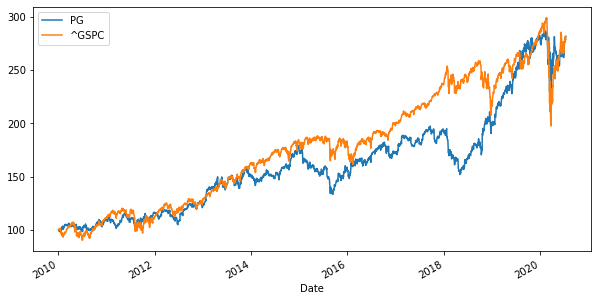

In [3]:
# normalize to 100
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
# to obtain an efficient frontier composed of these assets, we need their log returns
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() *250

PG       0.097730
^GSPC    0.096695
dtype: float64

In [7]:
log_returns.cov() *250

,PG,^GSPC
PG,0.029560,0.018051
^GSPC,0.018051,0.030719


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.599025
^GSPC,0.599025,1.000000


From this, we can see that PG and S&P500 had a solid rate of return, and the returns are well correlated (> 30%). Now, let's address portfolio optimization. 

First, we must create a variable that will carry the number of assets in our portfolio. We'll use it in our formulas so they can respond to a change in the number of assets that compose the portfolio.

In [10]:
num_assets = len(assets)
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.10256563, 0.21435871])

In [12]:
arr[0] + arr[1]

0.3169243450544237

This doesn't add to 1, so we'll fix that.

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.59532533, 0.40467467])

In [14]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.09731154357391598

Expected Portfolio Variance:

In [16]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02420456204617699

Expected Portfolio Volatility:

In [17]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1555781541418235

We went through these three cells because we will need the formulas for the return and the volatility in the simulation of the portfolios mean variance combinations. We'll create a graph where 1000 mean variance simulations will be plotted. 

Remember this: 

We're not considering 1000 different investments composed of different stocks. We're considering 1000 combinations of the same two assets PG and S&P500. This means we simulate 1000 combinations of their weight values. Out of the 1000 combinations, we will probably have a portfolio composed of 1% PG and 99% S&P500, and a portfolio composed of 99% PG and 1% S&P500. The idea is to compare the two and see which one is efficient. 

In [18]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.09708223262359157,
  0.09711542561191948,
  0.09709092916817695,
  0.09726226817674982,
  0.09672066346666836,
  0.09715498839126194,
  0.09752115431697879,
  0.09709634683138142,
  0.09722809427896184,
  0.09677774609948724,
  0.09724110610565223,
  0.09715501009656996,
  0.09705890708829844,
  0.09733852743910552,
  0.09737661719608115,
  0.09745042277875525,
  0.09754877169951283,
  0.09710954504568606,
  0.09726469749896718,
  0.09677734458828004,
  0.09708995771681102,
  0.09716134369825541,
  0.09721525326372121,
  0.09731585649850144,
  0.09676425463083817,
  0.09699935406060102,
  0.09682558791356817,
  0.09700704298130534,
  0.09717042131035036,
  0.09694010607595036,
  0.09712750670660435,
  0.09767945762522834,
  0.0968369511595652,
  0.09670640009984796,
  0.09715623189828976,
  0.09681365422793144,
  0.09735653874399713,
  0.09696537416574903,
  0.09692025279645818,
  0.09713194122213392,
  0.09701689738374353,
  0.09736009442956177,
  0.09745143848739402,
  0.09752801

In [19]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09708223, 0.09711543, 0.09709093, 0.09726227, 0.09672066,
        0.09715499, 0.09752115, 0.09709635, 0.09722809, 0.09677775,
        0.09724111, 0.09715501, 0.09705891, 0.09733853, 0.09737662,
        0.09745042, 0.09754877, 0.09710955, 0.0972647 , 0.09677734,
        0.09708996, 0.09716134, 0.09721525, 0.09731586, 0.09676425,
        0.09699935, 0.09682559, 0.09700704, 0.09717042, 0.09694011,
        0.09712751, 0.09767946, 0.09683695, 0.0967064 , 0.09715623,
        0.09681365, 0.09735654, 0.09696537, 0.09692025, 0.09713194,
        0.0970169 , 0.09736009, 0.09745144, 0.09752802, 0.09729874,
        0.09719325, 0.09680634, 0.09718263, 0.09745179, 0.09712001,
        0.09716519, 0.09703538, 0.0971722 , 0.09715824, 0.0968667 ,
        0.09718576, 0.09751153, 0.09718403, 0.09716587, 0.09683202,
        0.09707001, 0.09708313, 0.09682666, 0.09711817, 0.09759654,
        0.09751072, 0.09694958, 0.09719649, 0.09714933, 0.09724243,
        0.09713158, 0.09725283, 0.09681476, 0.09

Now that all the heavy lifting is done, let's see the output of our work.

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [21]:
portfolios.head()

,Return,Volatility
0,0.097082,0.156930
1,0.097115,0.156265
2,0.097091,0.156741
3,0.097262,0.155226
4,0.096721,0.173539


In [22]:
portfolios.tail()

,Return,Volatility
995,0.097075,0.157096
996,0.096857,0.165372
997,0.097415,0.157440
998,0.097296,0.155430
999,0.097054,0.157607


Text(0, 0.5, 'Expected Return')

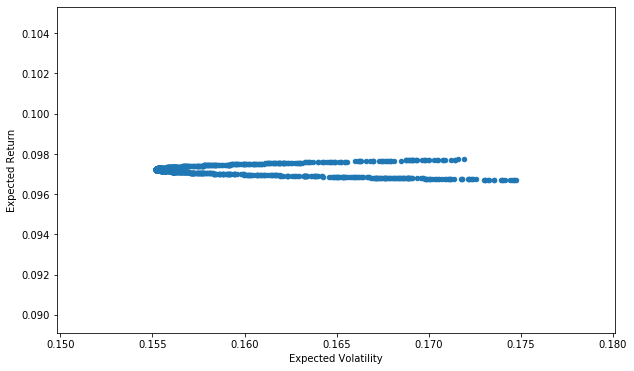

In [34]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')